# PROJECT 3 - Glass Identification

# Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass

Dataset Link-
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv
•	https://github.com/dsrscientist/dataset3


In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [10]:
df.columns = ['id','ri','na','mg','al','si','k','ca','ba','fe','Type of glass']
df

,id,ri,na,mg,al,si,k,ca,ba,fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [11]:
df.head(5)

,id,ri,na,mg,al,si,k,ca,ba,fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [12]:
df.tail(5)

,id,ri,na,mg,al,si,k,ca,ba,fe,Type of glass
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             213 non-null    int64  
 1   ri             213 non-null    float64
 2   na             213 non-null    float64
 3   mg             213 non-null    float64
 4   al             213 non-null    float64
 5   si             213 non-null    float64
 6   k              213 non-null    float64
 7   ca             213 non-null    float64
 8   ba             213 non-null    float64
 9   fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [14]:
df.dtypes

id                 int64
ri               float64
na               float64
mg               float64
al               float64
si               float64
k                float64
ca               float64
ba               float64
fe               float64
Type of glass      int64
dtype: object

In [15]:
df['Type of glass'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [19]:
df.describe()

,id,ri,na,mg,al,si,k,ca,ba,fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [20]:
df.skew()

id               0.000000
ri               1.639658
na               0.457318
mg              -1.154323
al               0.900017
si              -0.744546
k                6.549276
ca               2.040591
ba               3.406749
fe               1.747173
Type of glass    1.108861
dtype: float64

In [26]:
x = df.drop(['Type of glass'], axis=1)

In [28]:
y = df['Type of glass']

In [29]:
print(x)

      id       ri     na    mg    al     si     k    ca    ba    fe
0      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00
1      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00
2      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00
3      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00
4      6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26
..   ...      ...    ...   ...   ...    ...   ...   ...   ...   ...
208  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00
209  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00
210  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00
211  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00
212  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00

[213 rows x 10 columns]


In [30]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type of glass, Length: 213, dtype: int64


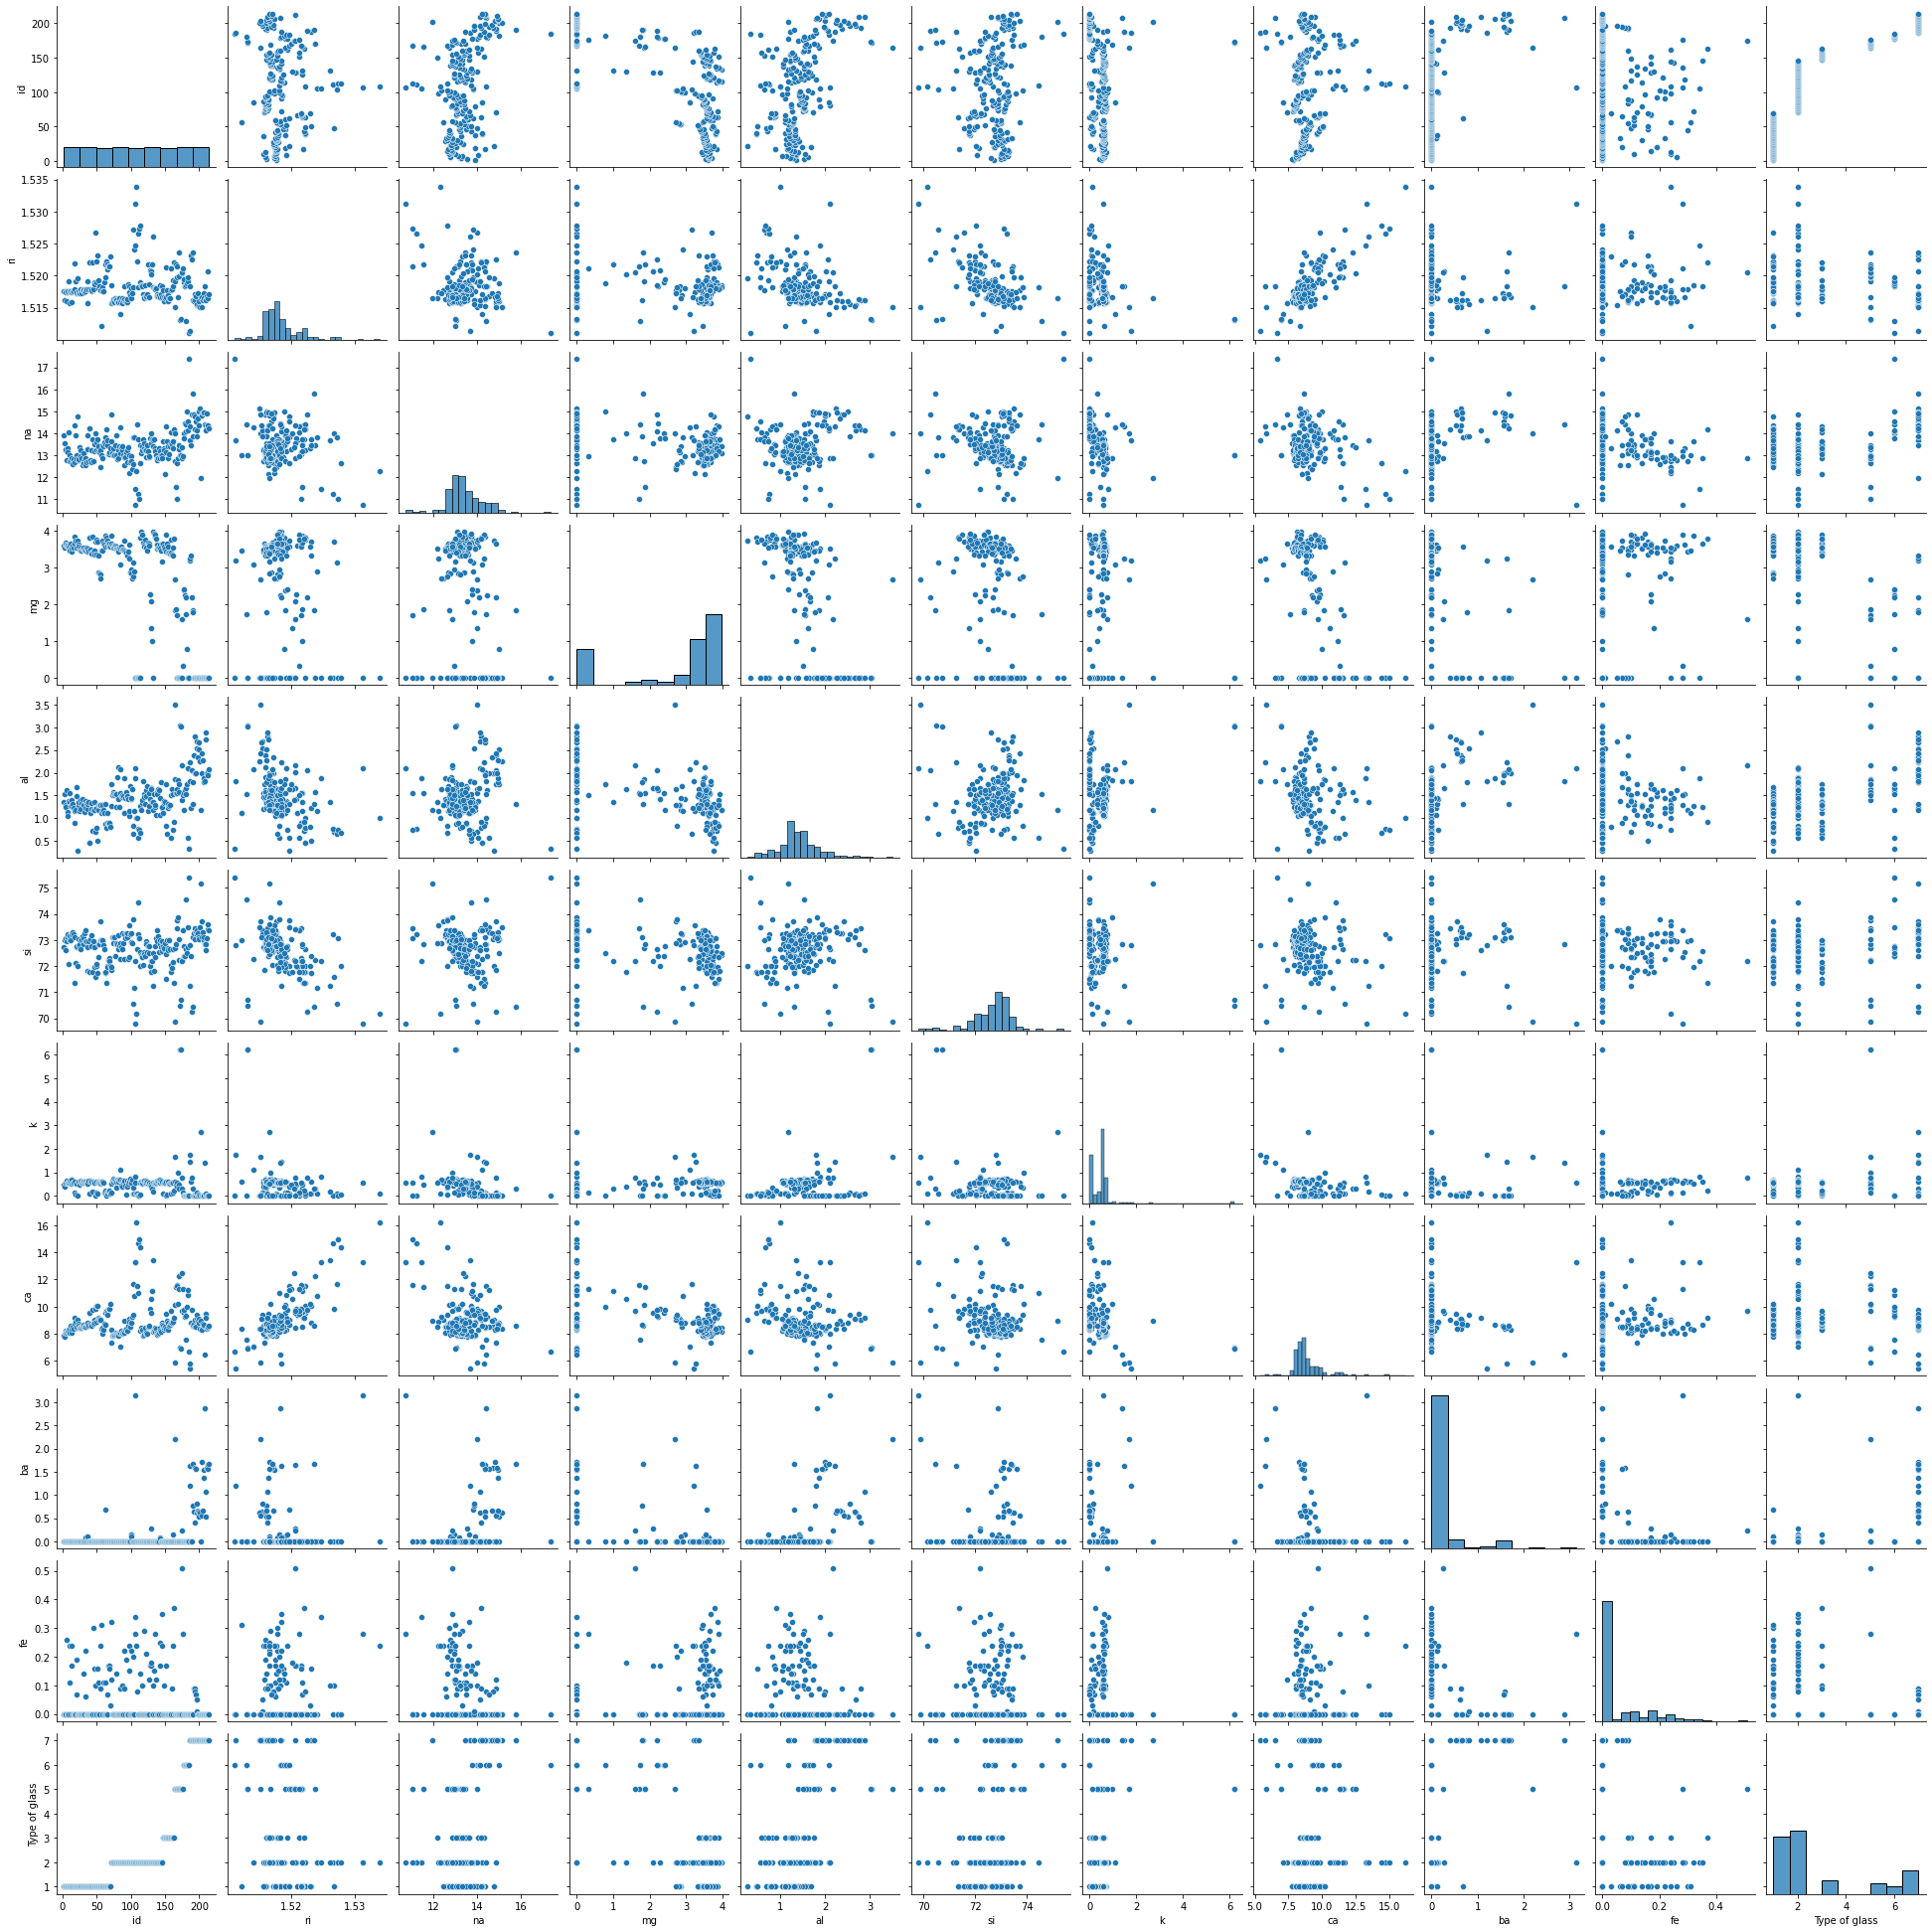

In [32]:
sns.pairplot(df)
plt.show()

# Checking of outliers

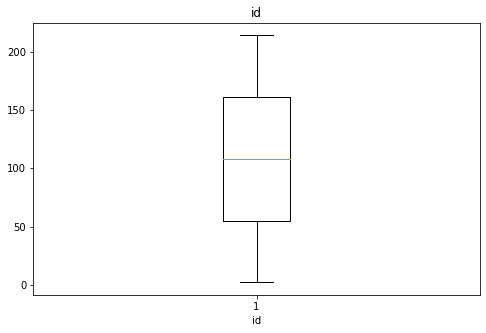

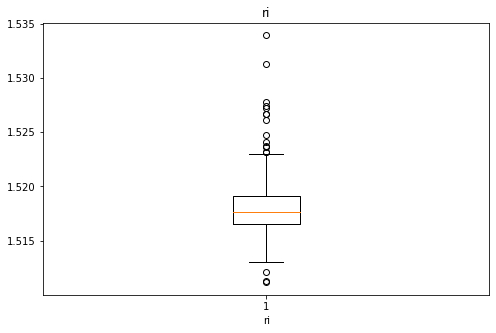

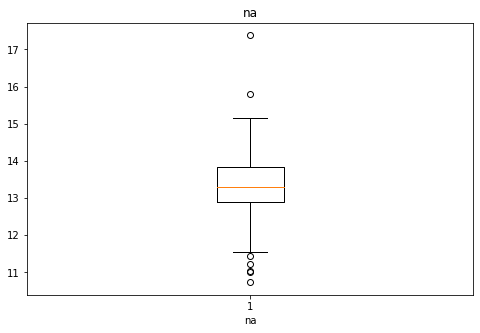

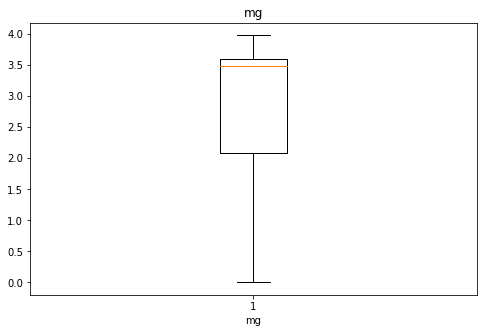

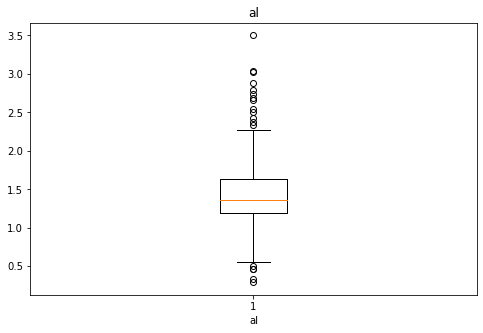

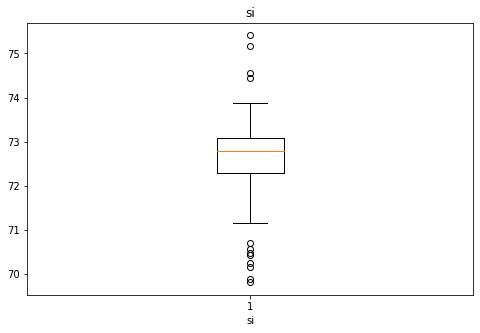

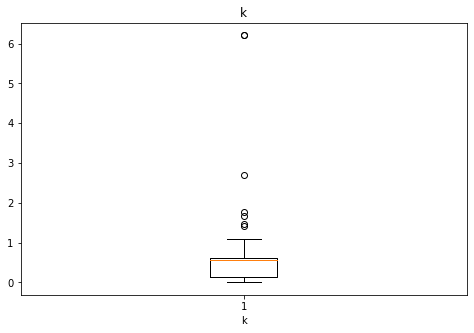

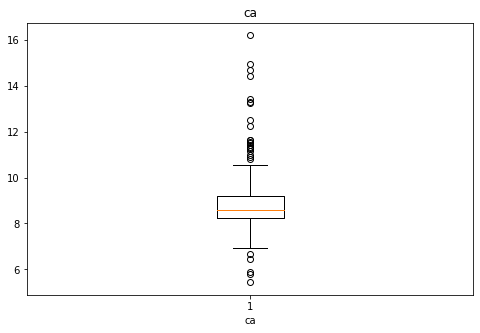

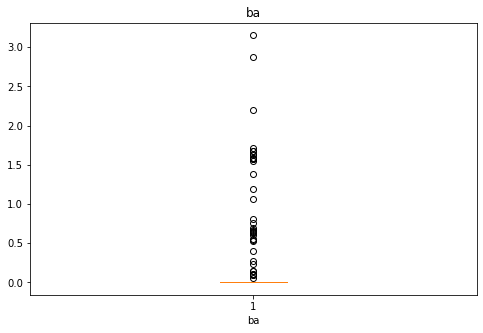

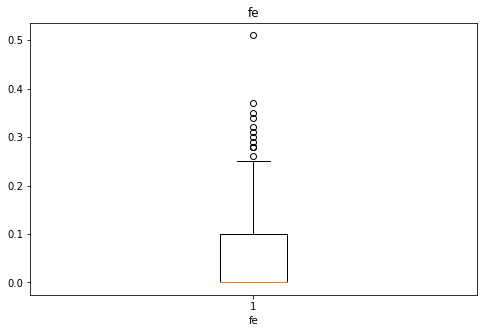

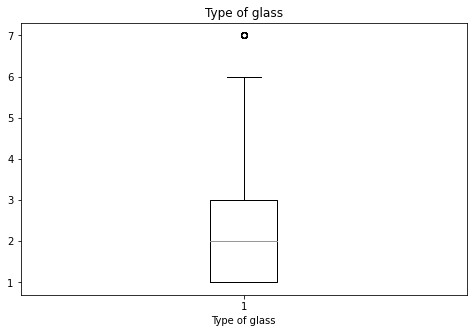

In [35]:
float_col = ['id','ri','na','mg','al','si','k','ca','ba','fe','Type of glass']

for column in float_col:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df[column], vert=True)
    plt.title(column)
    plt.xlabel(column)
    plt.show()

In [40]:
#Using zscore and NumPy library to remove outliers with a threshold value
threshold = 3
for column in float_col:   # Loop through each float column
    zscore = np.abs((df[column] - df[column].mean()) / df[column].std(ddof=0))
    data = df.drop(df[zscore > threshold].index)

In [41]:
z_scores = np.abs((df[float_col] - df[float_col].mean()) / df[float_col].std())
threshold = 3
data = df[(z_scores < threshold).all(axis=1)]
removed_data = pd.DataFrame(data, columns=data.columns)

removed_data

,id,ri,na,mg,al,si,k,ca,ba,fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [66]:
# Percentage of Data Loss

data_loss=(213-195)/213*100 
data_loss

8.450704225352112

According to the data loss report, 8.45% of the data has been lost.

In [68]:
x = df.drop("Type of glass",axis=1)
y = df["Type of glass"]

In [69]:
x.skew()

id    0.000000
ri    1.639658
na    0.457318
mg   -1.154323
al    0.900017
si   -0.744546
k     6.549276
ca    2.040591
ba    3.406749
fe    1.747173
dtype: float64

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

In [72]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.9534883720930233


In [73]:
print("Predicted values of Type of Glass:", y_predict)

Predicted values of Type of Glass: [1 7 1 7 2 2 1 2 2 2 6 5 2 2 6 5 7 1 1 3 2 7 7 7 3 2 1 1 6 1 1 2 3 2 1 7 5
 3 2 2 2 7 1]
